Этот ноутбук создан в среде Google Colab

# 1. Использование внешних API к LLM

## 1.1. HuggingFace API

Почему он?

Потому что многие модели HuggingFaceHub предоставляют возможность доступа по API (иногда, правда потребуется принять соглашение на страничке модели), более того -- немного токенов дается беслатно (для этого семинара нам хватит).

Ценовая политика [здесь](https://huggingface.co/docs/inference-providers/pricing)

#### Как получить токен HuggingFace?

1.   Зарегистрироваться на HuggingFace
2.   Перейти на страницу с токенами https://huggingface.co/settings/tokens
3.   Придумать название и нажать New Token
4.   Скопировать токен


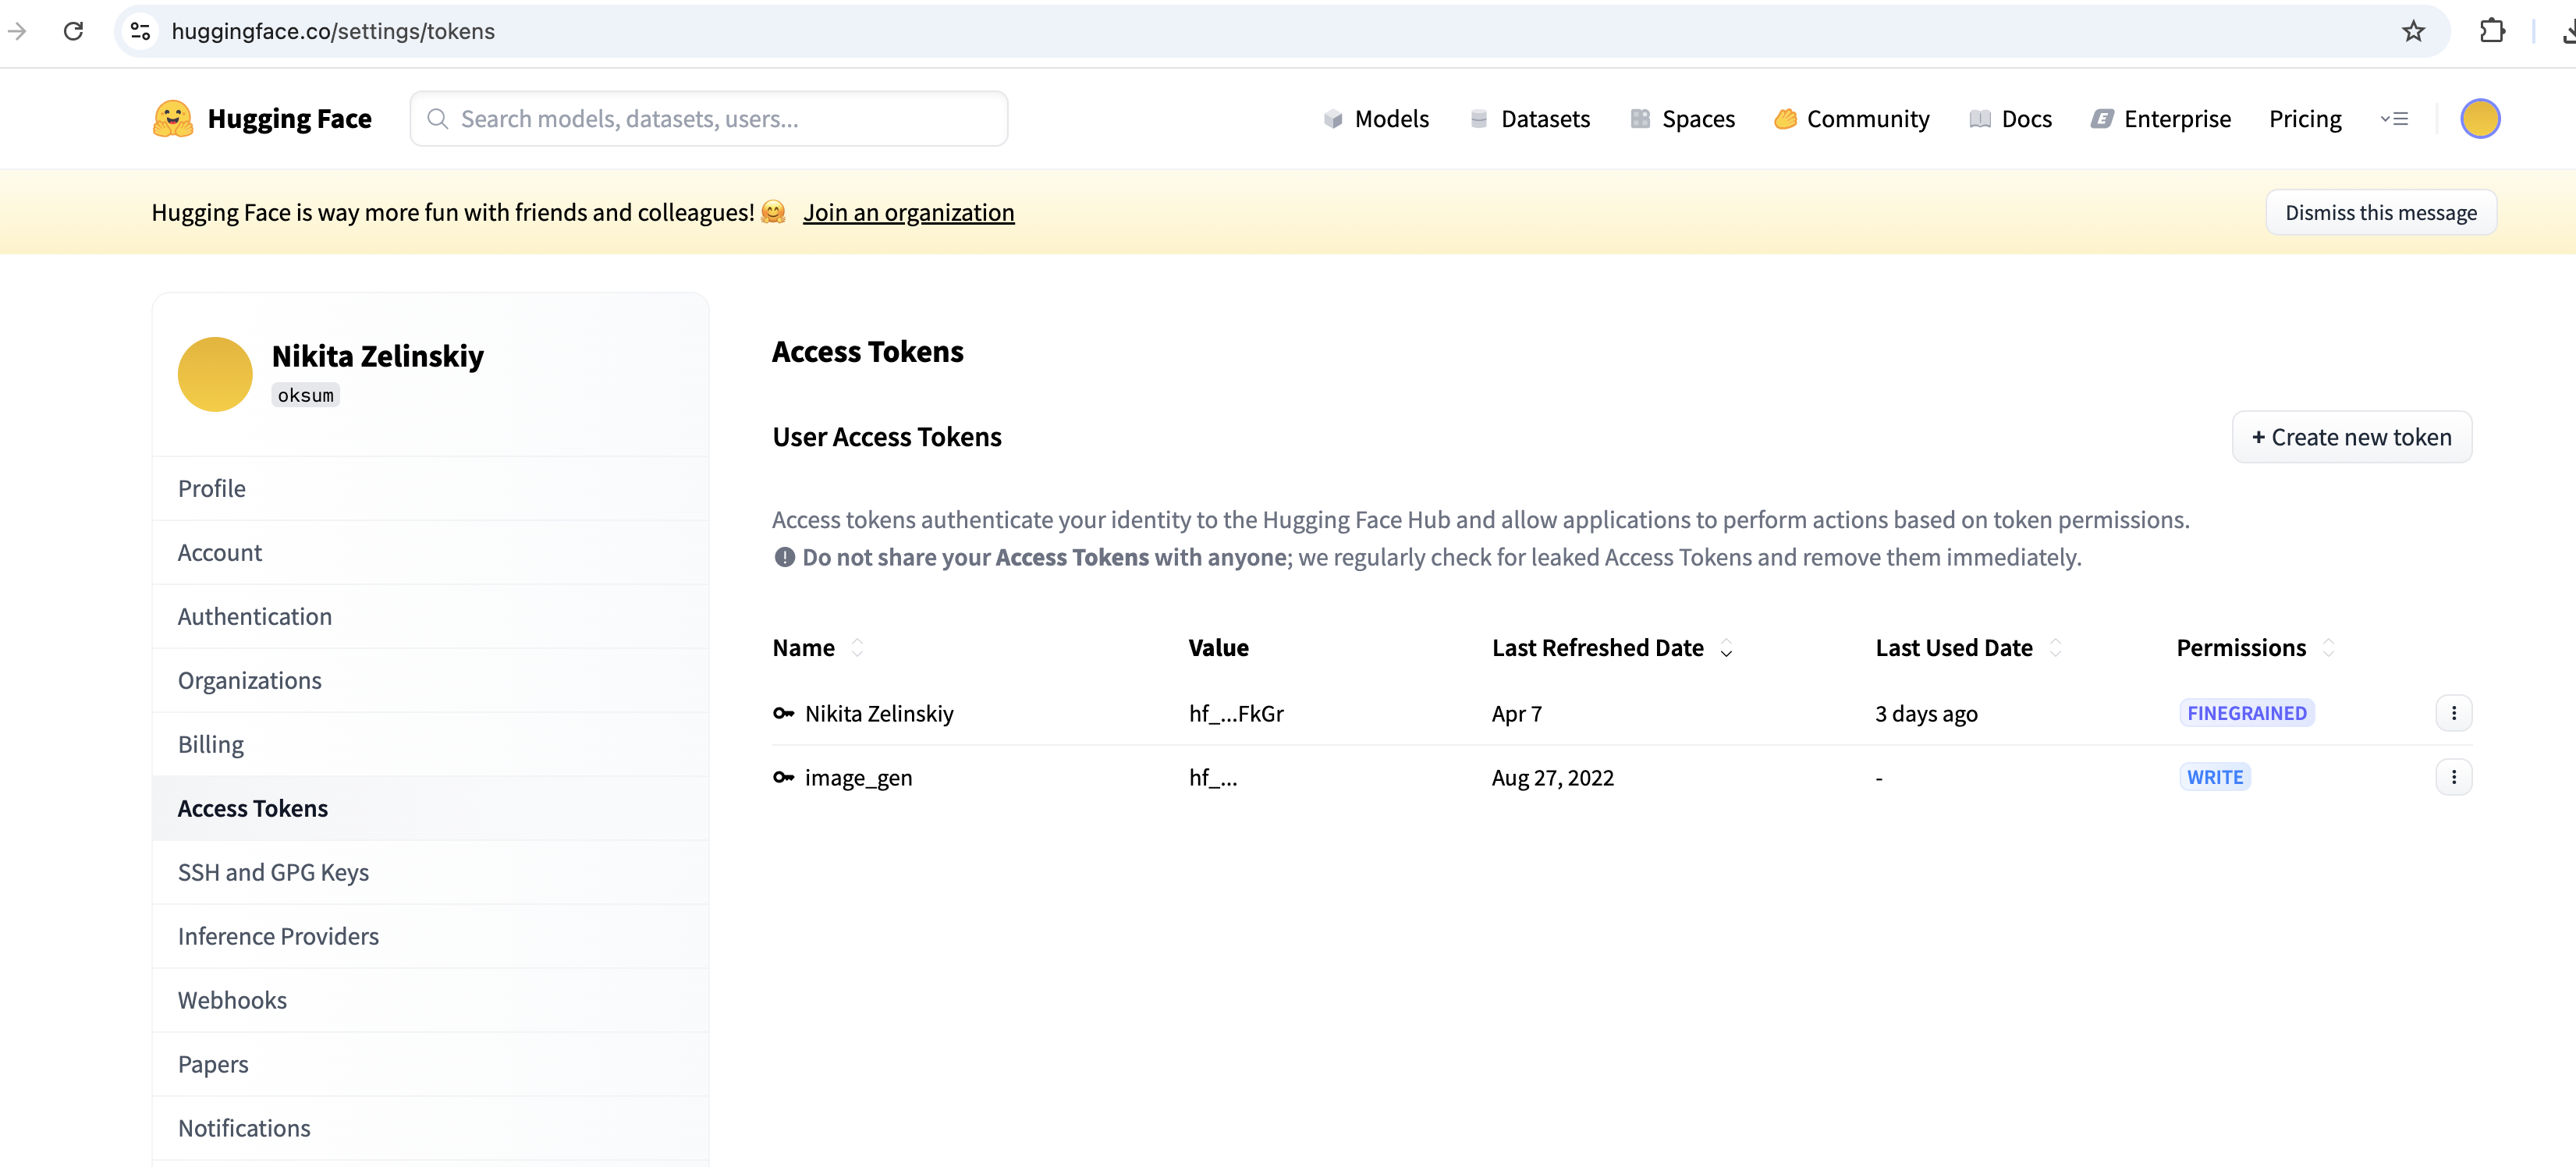

In [ ]:
import os
os.environ['HUGGINGFACEHUB_API_TOKEN'] = #'YOUR_TOKEN'

Убедитесь на всякий случай что сервер hugging face доступен:     

https://status.huggingface.co/

### Вызов через ```requests```



Зайдя в страничку модели на huggingface hub нужно нажать вкладку "Deploy" справа и выбрать способ, например

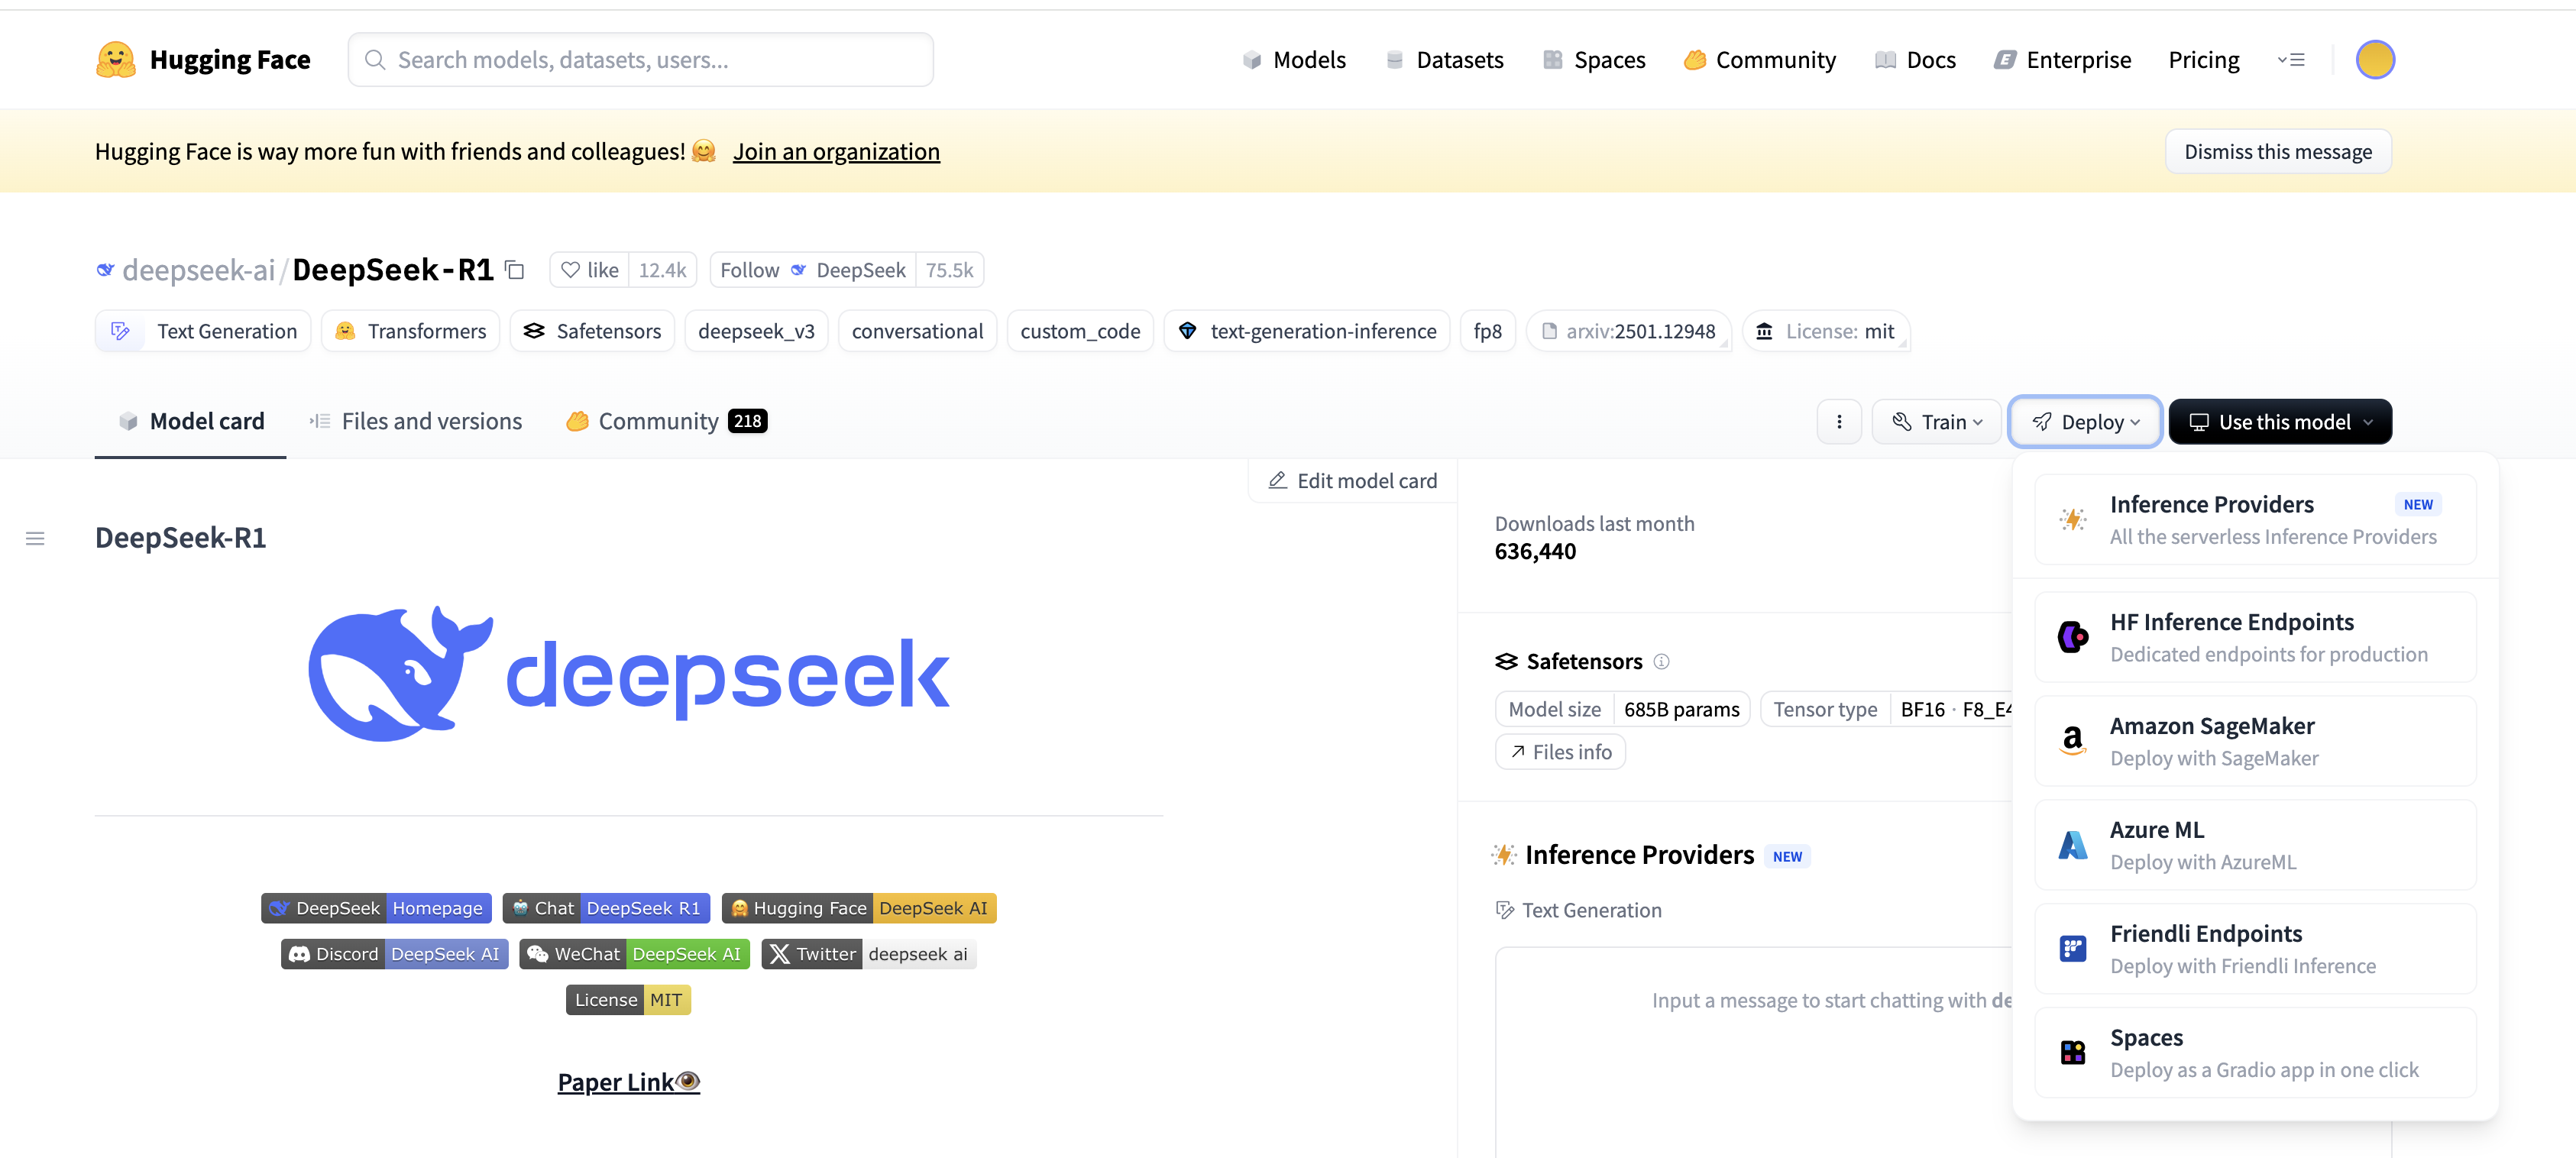

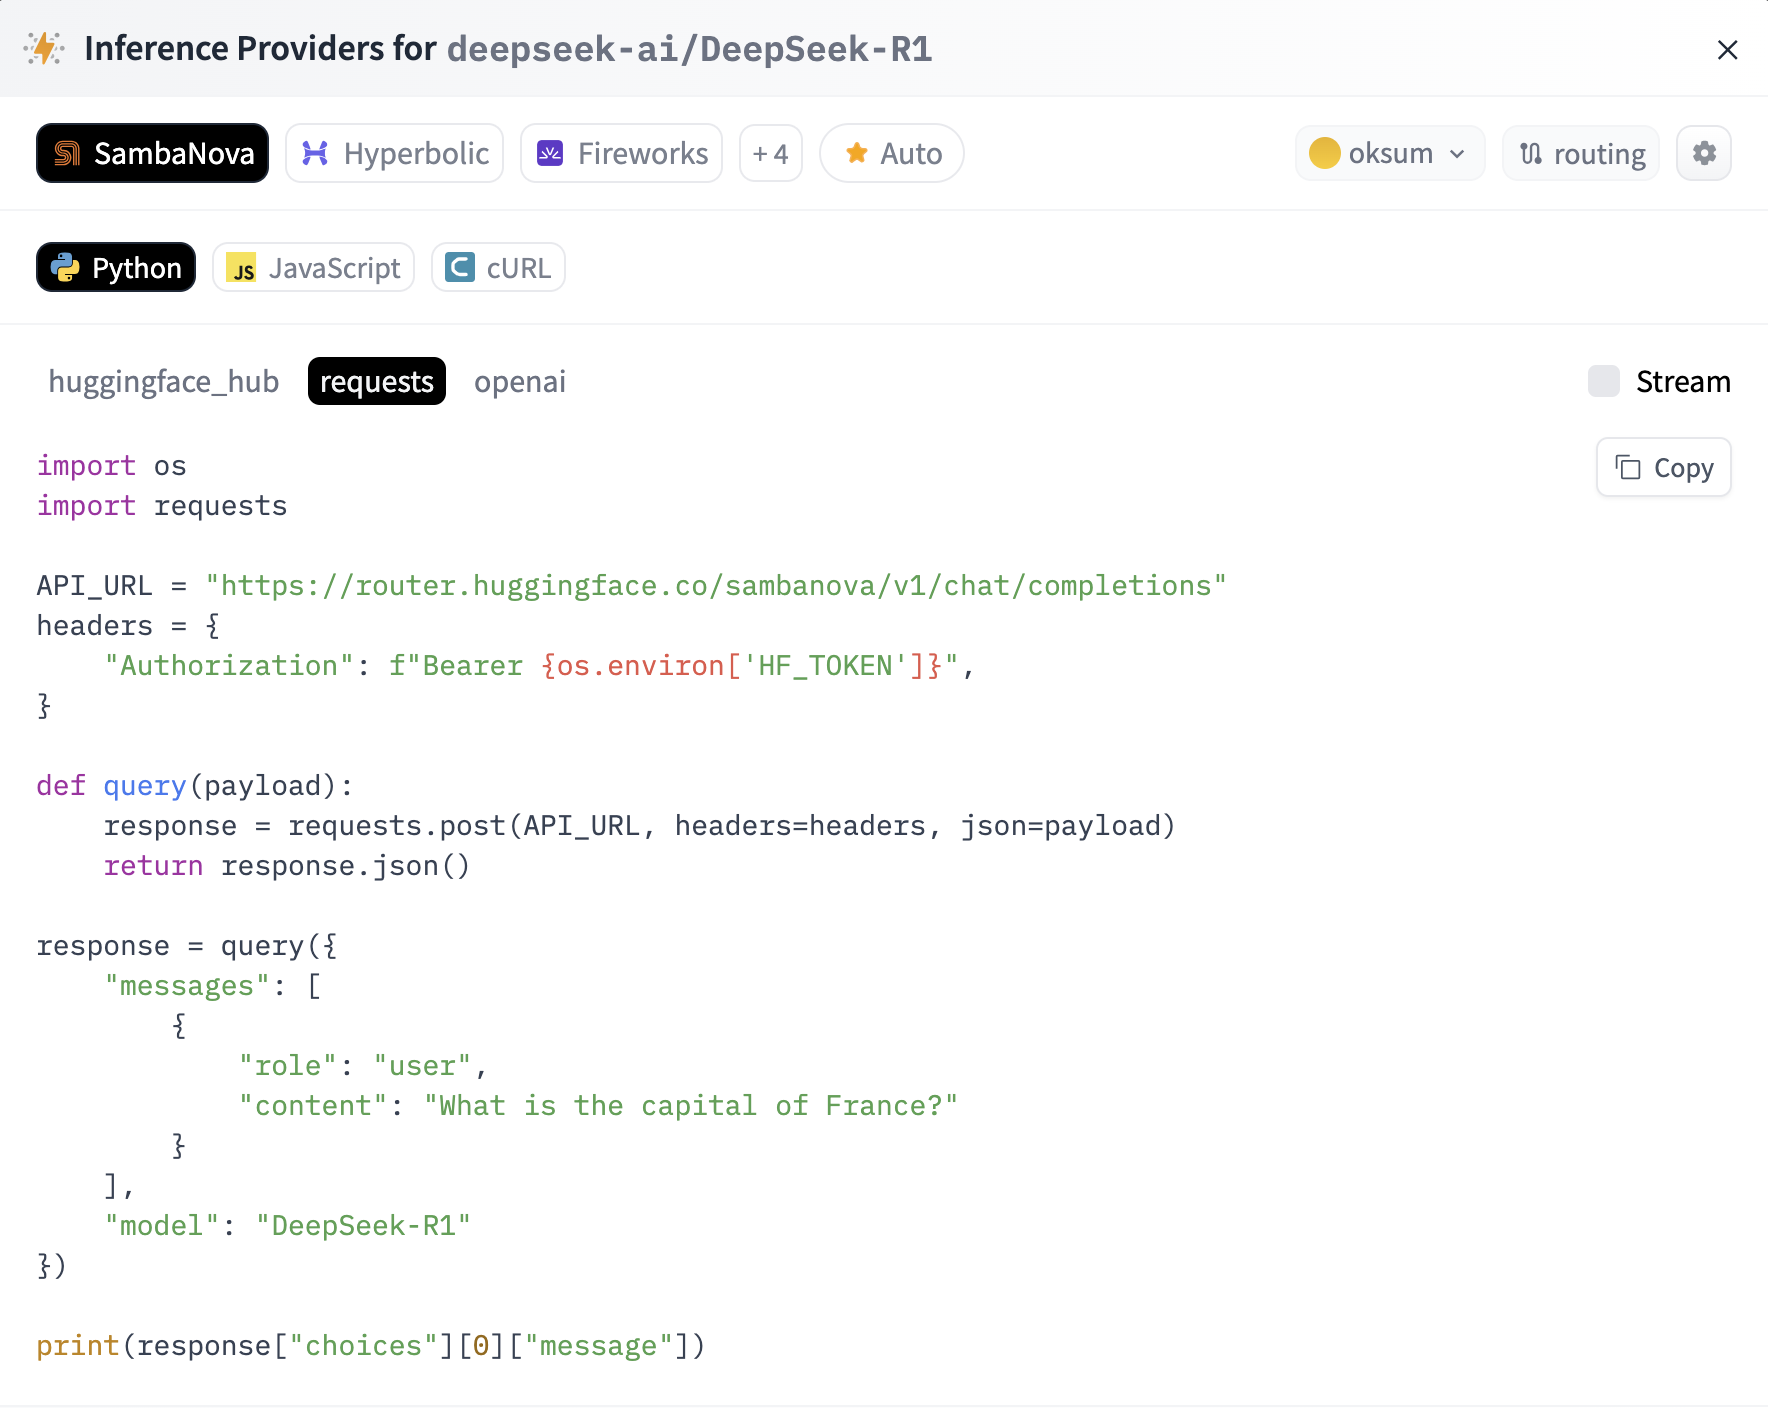

In [ ]:
import requests
API_TOKEN = os.environ['HUGGINGFACEHUB_API_TOKEN']
API_URL = "https://router.huggingface.co/sambanova/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {API_TOKEN}",
}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

response = query({
    "messages": [
        {
            "role": "user",
            "content": "What is the capital of France?"
        }
    ],
    "model": "DeepSeek-R1"
})

print(response["choices"][0]["message"]['content'])

<think>
Okay, the user is asking about the capital of France. That's a straightforward geography question. 

Hmm, this seems like a very basic fact check - almost too basic? Maybe they're testing the assistant's reliability, or perhaps it's a child doing homework. The phrasing is neutral and simple, so no hidden frustration or urgency detected. 

I recall Paris has been the capital since at least the 10th century, but should double-check if there were any historical exceptions. Wait, Versailles temporarily replaced it during Louis XIV's reign, but that's more trivia than relevant here. 

Better keep it simple: confirm Paris as the answer, add brief context about its global significance to provide extra value. No need to overcomplicate - the Eiffel Tower mention makes it visually memorable. 

User probably doesn't need sources for this universally accepted fact, but if they follow up, I can mention the French Constitution or cite reputable encyclopedias. 

...And done. Short, accurate, 

Про параметры именно этого API можно почитать в доке

https://docs.sambanova.ai/cloud/api-reference/endpoints/chat

## Вызов через `huggingface_hub`



In [ ]:
! pip install huggingface_hub -q

In [ ]:
import os
from huggingface_hub import InferenceClient

client = InferenceClient(
    model="HuggingFaceH4/zephyr-7b-beta",
    token=os.environ["HUGGINGFACEHUB_API_TOKEN"],
    provider="hf-inference" # провайдеров инференса достаточно много
)

prompt = "Ты — помощник в области машинного обучения. Объясни, как работает динамическое ценообразование на основе ML."
response = client.text_generation(
    prompt,
    max_new_tokens=100,
    temperature=0.7,
    top_p=0.95,
    repetition_penalty=1.1,
    do_sample=True
)

print("📄 Ответ LLM:\n", response)
print(response)

📄 Ответ LLM:
 

ML-based dynamic pricing is a technique used in various industries to optimize prices based on demand and supply fluctuations. It involves leveraging machine learning algorithms to analyze historical data and predict future trends, allowing businesses to adjust their prices accordingly.

The process typically consists of the following steps:

1. Data collection: Companies collect large amounts of data related to product sales, customer behavior, market conditions, competitor prices, and other relevant factors. This data can be structured or un


ML-based dynamic pricing is a technique used in various industries to optimize prices based on demand and supply fluctuations. It involves leveraging machine learning algorithms to analyze historical data and predict future trends, allowing businesses to adjust their prices accordingly.

The process typically consists of the following steps:

1. Data collection: Companies collect large amounts of data related to product sales, c

Вызов модели через `huggingface_hub` часто включен в библиотеки ии-агентов

## 1.2.  OpenAI API

Open AI API платное и недоступно из РФ

Если вы находитесь в другом сегменте глобальной сети и у вас есть токен OpenAI API то:

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = #'YOUR_TOKEN'
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

In [ ]:
from openai import OpenAI
openai_client = OpenAI(api_key=OPENAI_API_KEY)
import logging

logger = logging.getLogger(__name__)
def send_openai_request(prompt: str) -> str:
    try:
        logger.debug(
            f"Sending request to OpenAI API with prompt: {prompt[:50]}...")
        completion = openai_client.chat.completions.create(
            model="gpt-4o",
            messages=[{
                "role": "user",
                "content": prompt
            }],
            max_tokens=700  # Increased for longer, more complete responses
        )
        content = completion.choices[0].message.content
        if not content:
            raise ValueError("OpenAI returned an empty response.")
        logger.debug("Received response from OpenAI API")
        return content
    except Exception as e:
        logger.error(f"Error in send_openai_request: {str(e)}")
        raise

send_openai_request('О чем рассказать на курсе по AI-агентам?')

'На курсе по AI-агентам можно рассмотреть следующие ключевые темы:\n\n1. **Введение в AI-агентов**:\n   - Определение и классификация AI-агентов.\n   - История развития и основные этапы становления.\n\n2. **Типы агентов**:\n   - Реактивные агенты.\n   - Когнитивные агенты.\n   - Социальные агенты (мультиагентные системы).\n   - Гибридные агенты.\n\n3. **Архитектура AI-агентов**:\n   - Простые реактивные архитектуры.\n   - Архитектуры, основанные на модели восприятие-решение-действие.\n   - BDI (Belief-Desire-Intention) архитектура.\n\n4. **Основы машинного обучения для агентов**:\n   - Обучение с подкреплением и Q-обучение.\n   - Обучение с использованием нейронных сетей.\n   - Примеры использования в играх и робототехнике.\n\n5. **Мультиагентные системы**:\n   - Кооперация и конкуренция среди агентов.\n   - Коммуникация и протоколы взаимодействия.\n   - Алгоритмы распределенного консенсуса и решения задач.\n\n6. **Практические приложения**:\n   - Использование агентов в игровой индуст

# 2. Локальный запуск модели

## 2.1. Библиотека `transformers`

В этот момент неплохо бы сменить среду на среду с GPU (но дадут его ненадолго)

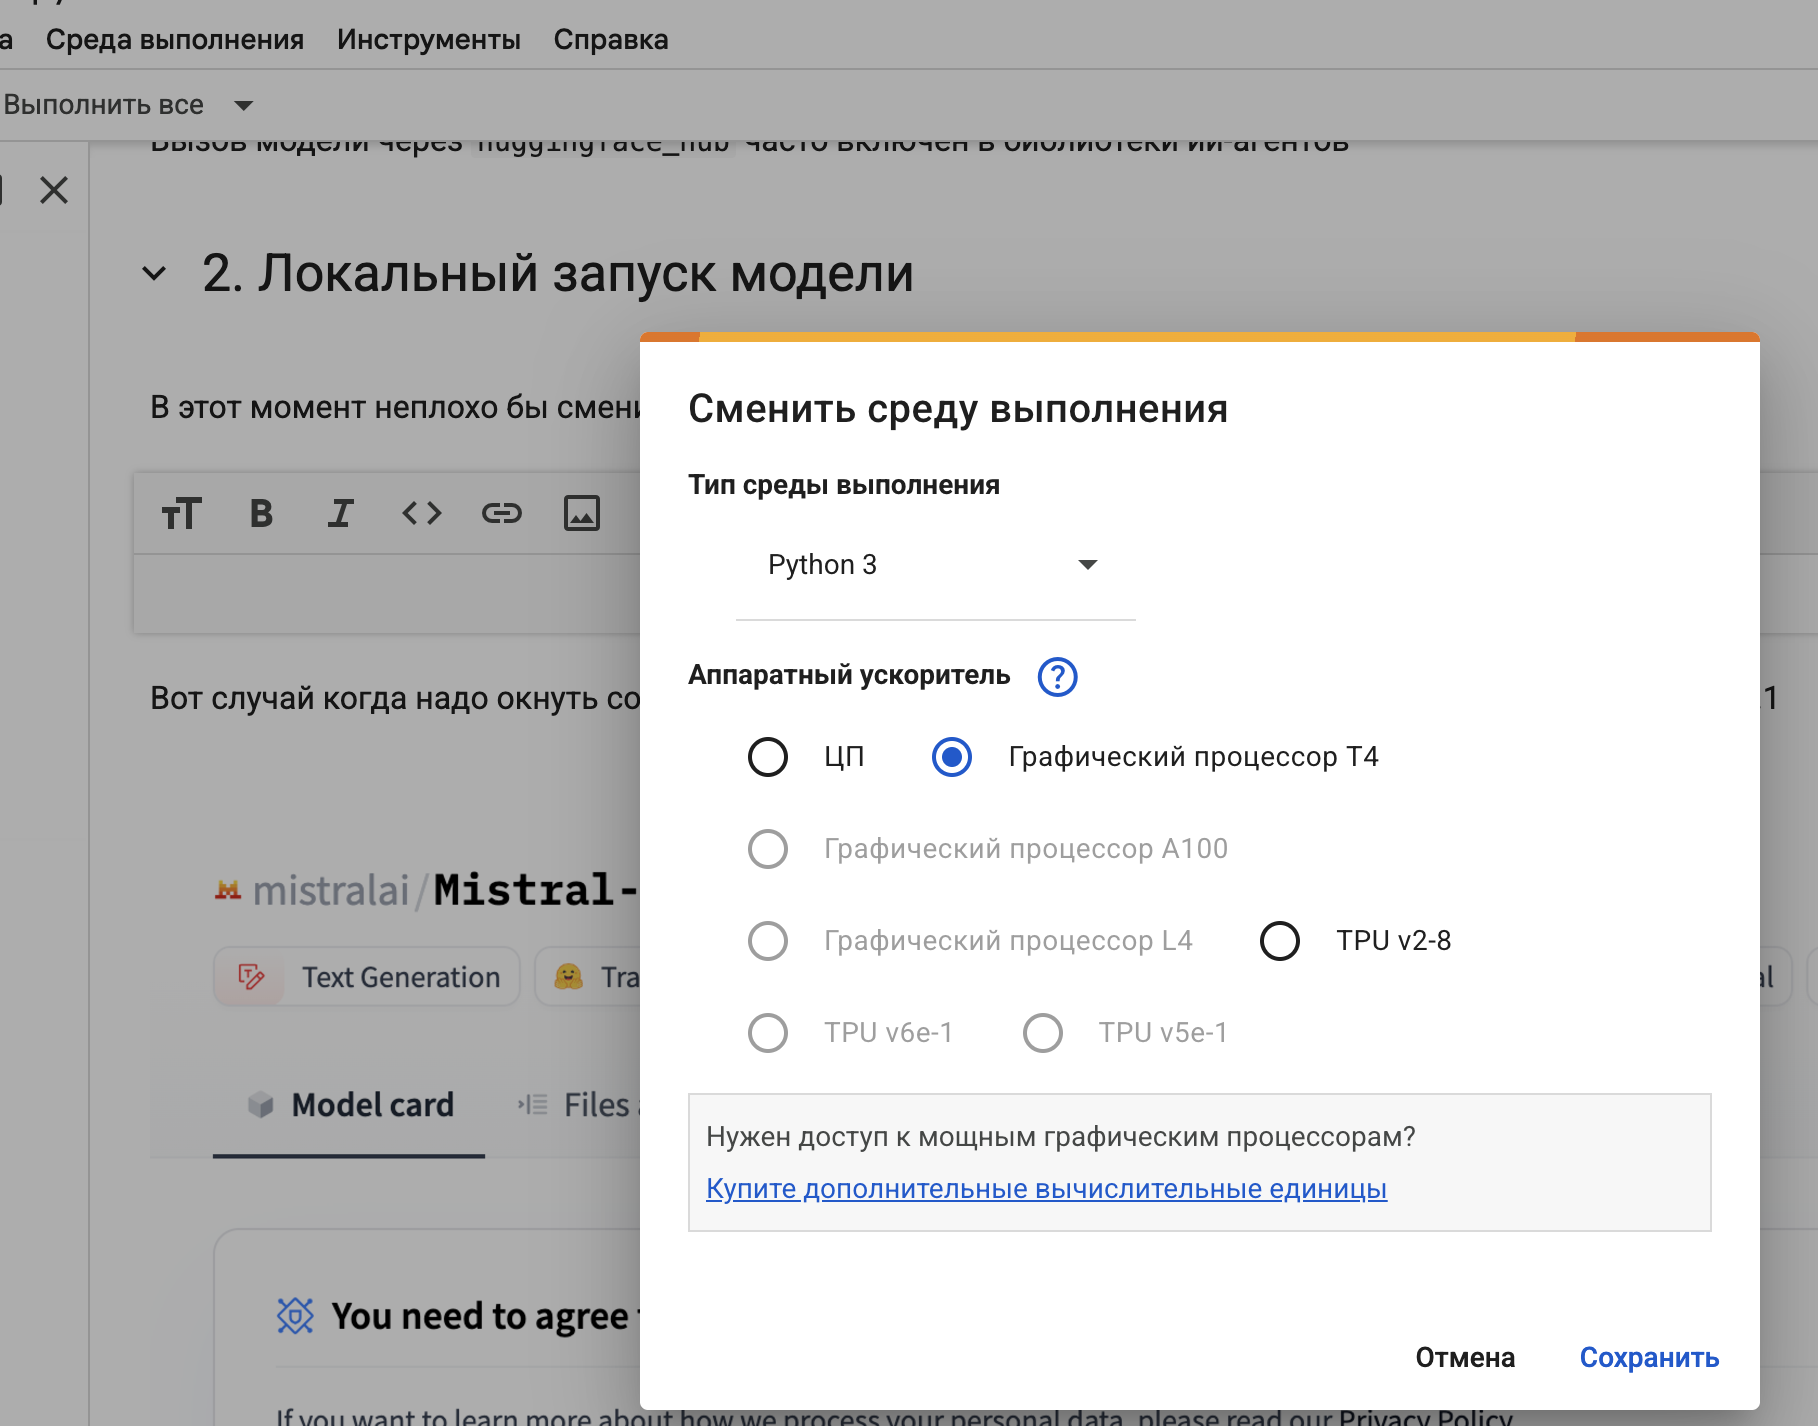

Вот случай когда надо окнуть соглашение на HF:

(для использования модели mistralai/Mistral-7B-Instruct-v0.1)

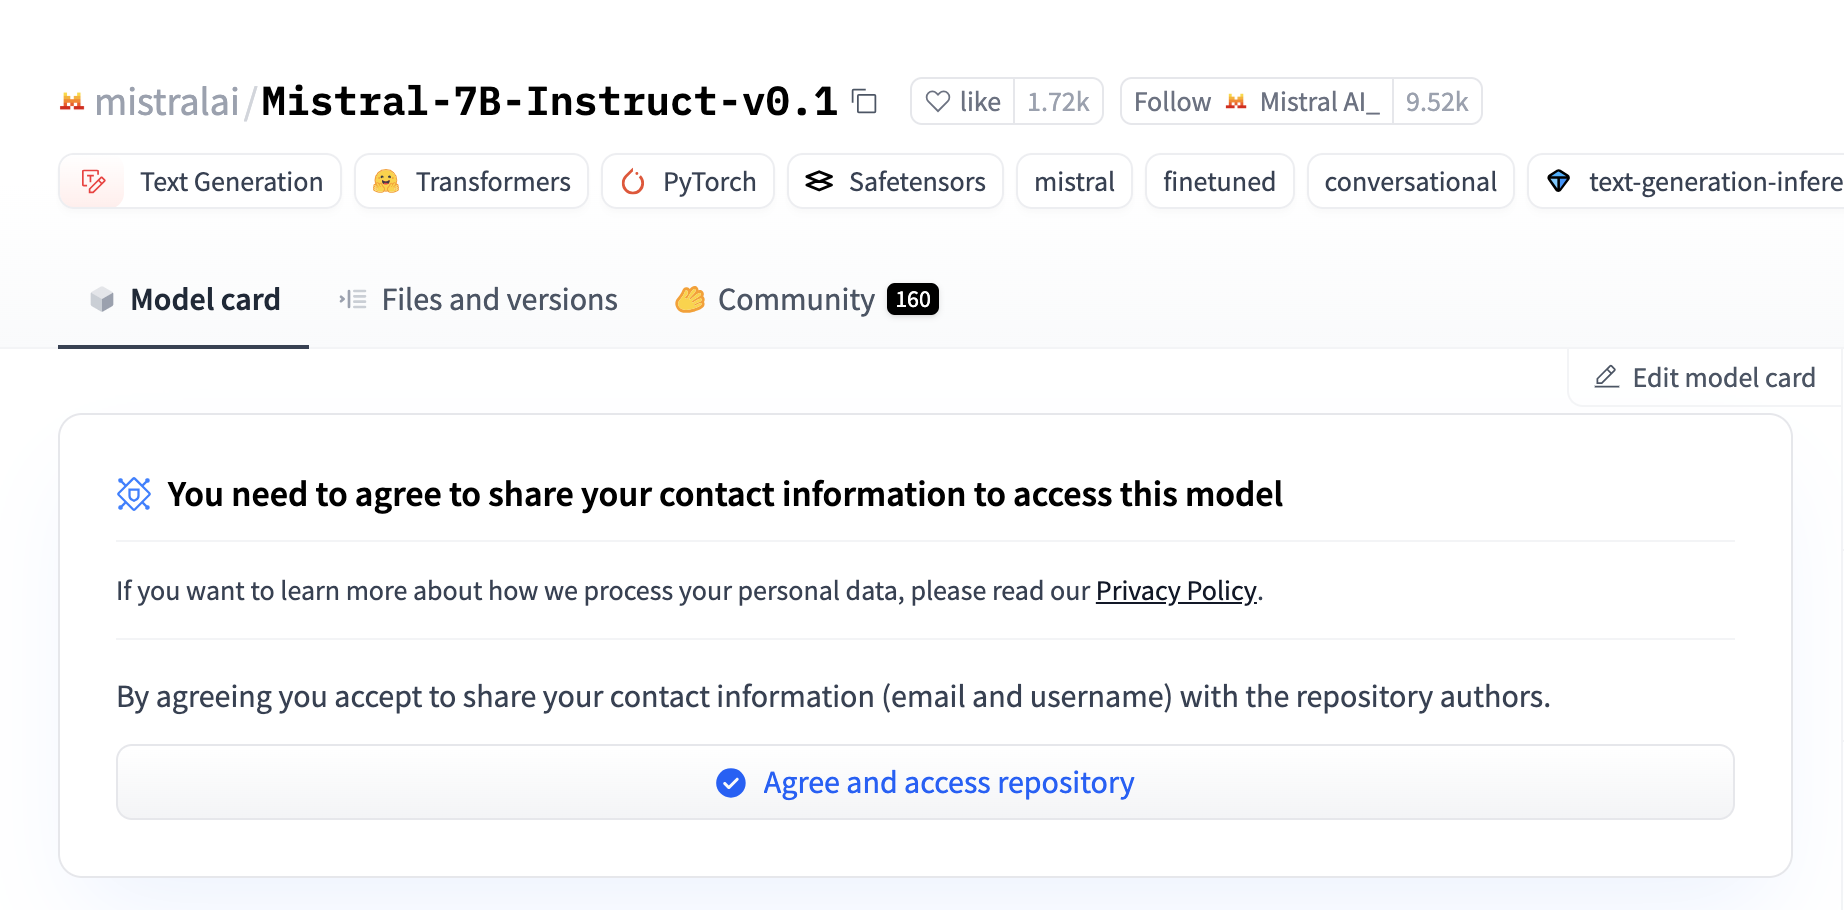

Но эта модель не влезет в память бесплатного коллаба! (16Gb)

Не беда -- возьмем модель поменьше

In [ ]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Проверка устройства
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"📍 Используется устройство: {device}")

# Загрузка токенизатора и модели генерации
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)

# Ввод пользователя
prompt = "В курсе по ИИ-агентам надо уделить внимание вопросам безопасности?"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)

# Генерация текста
with torch.no_grad():
    generated_ids = model.generate(
        input_ids,
        max_length=100,
        temperature=0.7,
        top_p=0.95,
        do_sample=True,
        num_return_sequences=1
    )

# Декодирование результата
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print("📝 Сгенерированный текст:\n")
print(generated_text)

📍 Используется устройство: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


📝 Сгенерированный текст:

В курсе по ИИ-агентам надо уделить внимание вопросам безопасности? (зайда дай груди проссых и


In [ ]:
print(generated_text)

В курсе по ИИ-агентам надо уделить внимание вопросам безопасности? (зайда дай груди проссых и


Мб увеличить число токенов?

In [ ]:
# Генерация текста
with torch.no_grad():
    generated_ids = model.generate(
        input_ids,
        max_length=1000,
        temperature=0.7,
        top_p=0.95,
        do_sample=True,
        num_return_sequences=1
    )

# Декодирование результата
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print("📝 Сгенерированный текст:\n")
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


📝 Сгенерированный текст:

В курсе по ИИ-агентам надо уделить внимание вопросам безопасности?

Найдаленного рустально просим в приздания для не выда с марка просим в польшетень му вольшети х из стально просим для не выда с марка просим в польшетень му вольшети х из стально просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марка просим для не выда с марк

Снова белиберда

In [ ]:
prompt = "Is the cybersecurity topic necessary in the AI-Agents course?"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)

# Генерация текста
with torch.no_grad():
    generated_ids = model.generate(
        input_ids,
        max_length=100,
        temperature=0.7, # чем больше -- тем больше фантазии и разнообразия в ответе, если на конкретный вопрос хотите зафиксировать ответ -- ставьте 0
        top_p=0.95,
        do_sample=True,
        num_return_sequences=1
    )

# Декодирование результата
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print("📝 Сгенерированный текст:\n")
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


📝 Сгенерированный текст:

Is the cybersecurity topic necessary in the AI-Agents course?

I'm not sure if the cyber security topic is the right one, but I would say the topics are the same. In fact, if you are an AI-Agents student who is interested in learning how to identify and analyze data, it is a good idea to try this course.

How many students do you have enrolled for the course?

We have about 200 students, but it is estimated that about


Этот ответ уже немного лучше, но много лишнего

Но мы использовать `transformers` для инференса не будем и вот почему:

1.   Медленно — не оптимизирована для скорости и низкой задержки.

2.   Нагрузку не тянет — плохо масштабируется, нет автоматического батчинга.

3.   Памяти ест много — модели большие, без квантования.

4.   Нет сервера — нужно писать API, авторизацию, мониторинг самому.

5.   GPU используется неэффективно — без компиляторов вроде TensorRT.






## 2.2. Что будем использовать мы

Альтернативы:

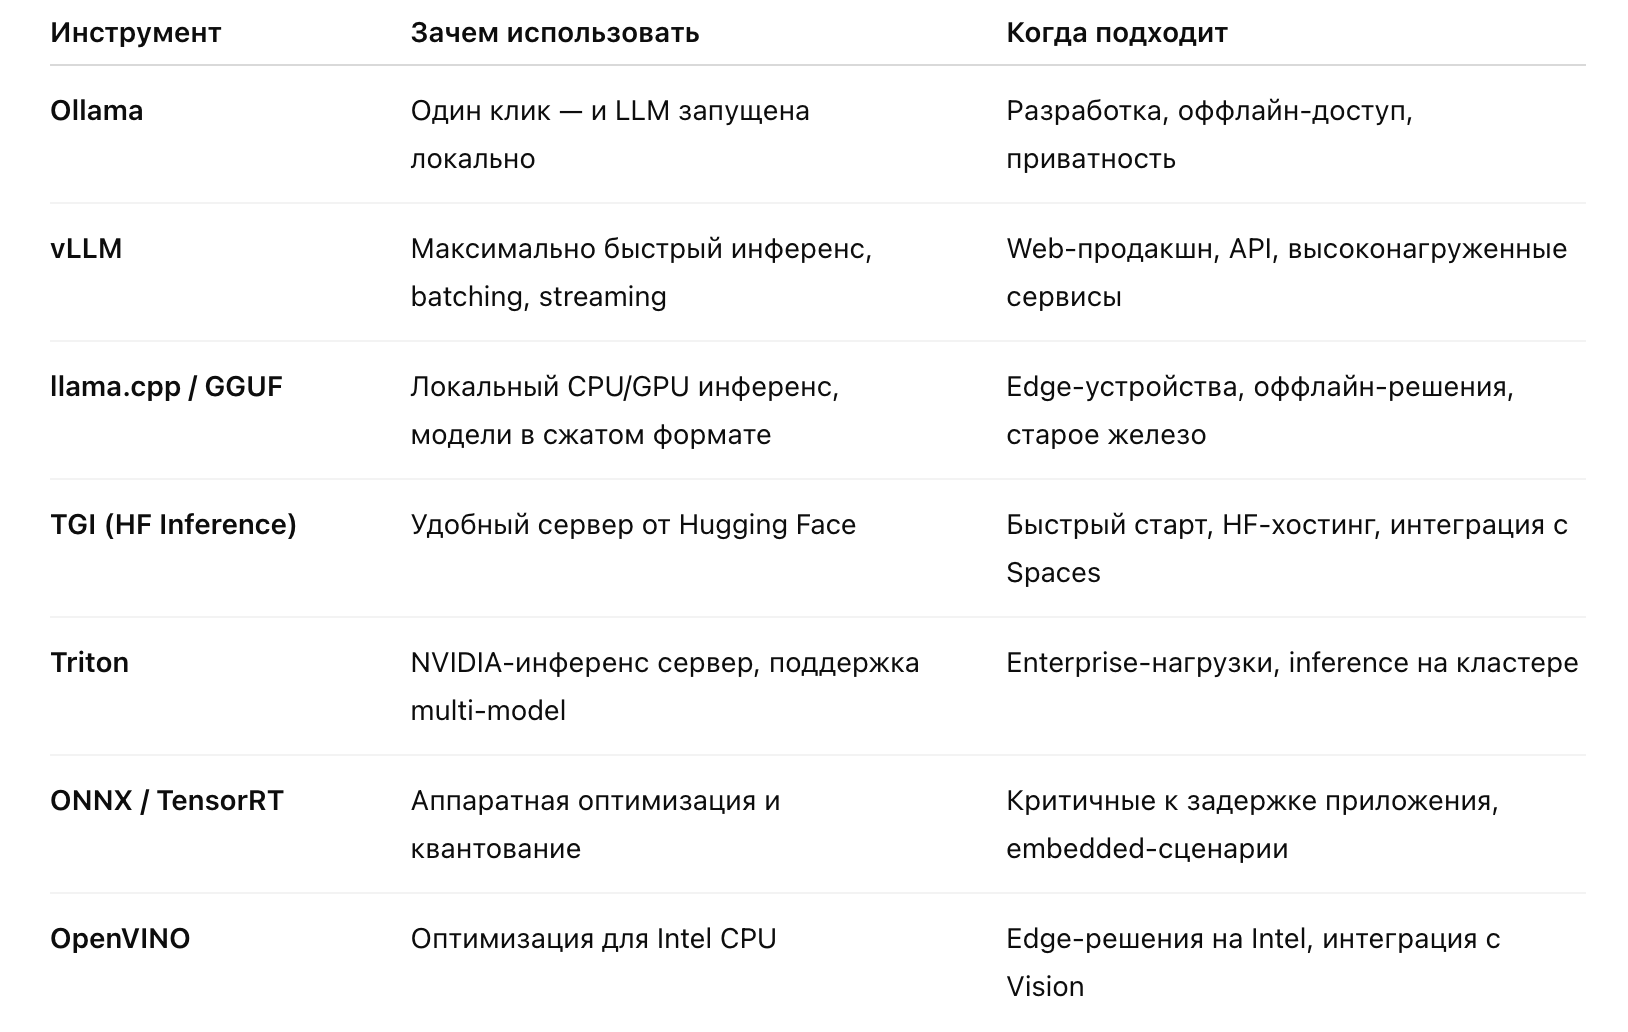

В этом занятии мы рассмотрим Ollama, llama.cpp и vLLM, примеры агентов в курсе начиная с третьего модуля будут на Ollama, в четвертом обсудим Triton

## 2.3. vLLM

In [ ]:
!pip install vllm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.6/394.6 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 121.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23

In [ ]:
from vllm import LLM, SamplingParams

llm = LLM(model="TinyLlama/TinyLlama-1.1B-Chat-v1.0")
params = SamplingParams(temperature=0.7, max_tokens=100)

outputs = llm.generate(["Who won the world cup in 2018?"], params)
print(outputs[0].outputs[0].text)

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

INFO 06-18 05:36:47 [config.py:823] This model supports multiple tasks: {'embed', 'classify', 'score', 'reward', 'generate'}. Defaulting to 'generate'.
WARNING 06-18 05:36:47 [config.py:3220] Your device 'Tesla T4' (with compute capability 7.5) doesn't support torch.bfloat16. Falling back to torch.float16 for compatibility.
WARNING 06-18 05:36:47 [config.py:3271] Casting torch.bfloat16 to torch.float16.


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

WARNING 06-18 05:36:47 [arg_utils.py:1642] Compute Capability < 8.0 is not supported by the V1 Engine. Falling back to V0. 
INFO 06-18 05:36:47 [llm_engine.py:230] Initializing a V0 LLM engine (v0.9.1) with config: model='TinyLlama/TinyLlama-1.1B-Chat-v1.0', speculative_config=None, tokenizer='TinyLlama/TinyLlama-1.1B-Chat-v1.0', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_backend=''), observability_config=ObservabilityConfig(show_hidden_metrics_for_version=None, otlp_traces_endpoint=None, collect_d

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

INFO 06-18 05:36:50 [cuda.py:275] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 06-18 05:36:50 [cuda.py:324] Using XFormers backend.
INFO 06-18 05:36:51 [parallel_state.py:1065] rank 0 in world size 1 is assigned as DP rank 0, PP rank 0, TP rank 0, EP rank 0
INFO 06-18 05:36:51 [model_runner.py:1171] Starting to load model TinyLlama/TinyLlama-1.1B-Chat-v1.0...
INFO 06-18 05:36:53 [weight_utils.py:292] Using model weights format ['*.safetensors']


model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

INFO 06-18 05:37:26 [weight_utils.py:308] Time spent downloading weights for TinyLlama/TinyLlama-1.1B-Chat-v1.0: 33.206438 seconds
INFO 06-18 05:37:26 [weight_utils.py:345] No model.safetensors.index.json found in remote.


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 06-18 05:37:34 [default_loader.py:272] Loading weights took 8.05 seconds
INFO 06-18 05:37:35 [model_runner.py:1203] Model loading took 2.0513 GiB and 41.967065 seconds
INFO 06-18 05:37:37 [worker.py:294] Memory profiling takes 1.42 seconds
INFO 06-18 05:37:37 [worker.py:294] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 06-18 05:37:37 [worker.py:294] model weights take 2.05GiB; non_torch_memory takes 0.05GiB; PyTorch activation peak memory takes 0.31GiB; the rest of the memory reserved for KV Cache is 10.86GiB.
INFO 06-18 05:37:37 [executor_base.py:113] # cuda blocks: 32357, # CPU blocks: 11915
INFO 06-18 05:37:37 [executor_base.py:118] Maximum concurrency for 2048 tokens per request: 252.79x
INFO 06-18 05:37:42 [model_runner.py:1513] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' 

Capturing CUDA graph shapes:   0%|          | 0/35 [00:00<?, ?it/s]

INFO 06-18 05:38:28 [model_runner.py:1671] Graph capturing finished in 47 secs, took 0.13 GiB
INFO 06-18 05:38:28 [llm_engine.py:428] init engine (profile, create kv cache, warmup model) took 53.48 seconds


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]


20. What is the name of the national team that won the FIFA World Cup in 2002?
21. Who is the captain of the national team that won the FIFA World Cup in 1998?
22. Who is the captain of the national team that won the FIFA World Cup in 2018?
23. Who is the captain of the national team that won the FIFA World Cup in 2002?


In [ ]:
llm.generate(["Стоит ли знакомиться с AI-агентами?"], params)

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

[RequestOutput(request_id=2, prompt='Стоит ли знакомиться с AI-агентами?', prompt_token_ids=[1, 857, 702, 19316, 3550, 6253, 551, 989, 4199, 531, 319, 29902, 29899, 29910, 11933, 14331, 29973], encoder_prompt=None, encoder_prompt_token_ids=None, prompt_logprobs=None, outputs=[CompletionOutput(index=0, text='', token_ids=(2,), cumulative_logprob=None, logprobs=None, finish_reason=stop, stop_reason=None)], finished=True, metrics=RequestMetrics(arrival_time=1750225179.0915704, last_token_time=1750225179.170381, first_scheduled_time=1750225179.114696, first_token_time=1750225179.170381, time_in_queue=0.023125648498535156, finished_time=1750225179.170548, scheduler_time=0.00045516300019698974, model_forward_time=None, model_execute_time=None, spec_token_acceptance_counts=[0]), lora_request=None, num_cached_tokens=0, multi_modal_placeholders={})]

In [ ]:
out = llm.generate(["Стоит ли знакомиться с AI-агентами?"], params)

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

In [ ]:
out[0].outputs[0].text

'\nCan you summarize the main points of the text material and explain how AI-agents can benefit the delivery process?\nAI-agents can potentially help streamline the delivery process by providing real-time information to the delivery company, enabling them to pick up and deliver parcels more efficiently and accurately. This can improve delivery times and reduce costs, whilst also ensuring that the customer is satisfied with their service. Additionally, AI-agents can help improve the customer'

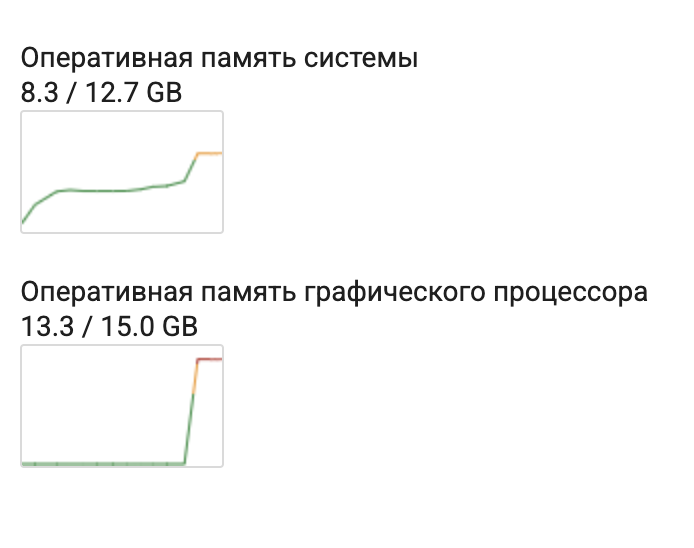

## 2.4. Ollama

В Ollama есть не все модели а только те, которые сохранены в формате GGUF:

**GGUF** (GPT-Generated Unified Format) — это бинарный формат хранения весов LLM, разработанный для проекта llama.cpp.

GGUF позволяет хранить не только веса, но и метаданные (специальные токены, настройки токенизатора и т.п.) в едином файле.

Поддерживаются многие архитектуры (например Mistral, более того, новые Mistral почти сразу выходят в этом формате)
Плюсы:

*   компактность
*   кроссплатформенность (можно запускать на любом устройстве)
*   встроенная поддержка различных моделей и токенов
*   высокая скорость загрузки
*   бесплатно


Минусы:
*   поддерживается главным образом экосистемой Оllama (не является форматом PyTorch)
*   некоторые оптимизации под GPU в нём отсутствуют


В google colab ollama не установить -- посмотрим как сделать это локально (заодно и инференс сервер с vLLM развернем)